# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

NumExpr defaulting to 8 threads.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

# Carregar os dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

# Criar a variável flag_doente (1 = doente, 0 = saudável)
df['flag_doente'] = (df['num'] != 0).astype('int64')

# Exibir as primeiras linhas do DataFrame
df.head()

# Exibir informações básicas do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [2]:
import pandas as pd
import numpy as np

# Função para calcular a bivariada
def bivariada(df, variavel_resposta, variavel_explicativa):
    """
    Calcula a análise bivariada entre uma variável resposta e uma variável explicativa.

    Parâmetros:
    df (pd.DataFrame): DataFrame contendo os dados.
    variavel_resposta (str): Nome da variável resposta binária (0 ou 1).
    variavel_explicativa (str): Nome da variável explicativa.

    Retorna:
    pd.DataFrame: DataFrame com as estatísticas da bivariada.
    """
    # Agrupar por variável explicativa e calcular as estatísticas
    bivariada_df = df.groupby(variavel_explicativa)[variavel_resposta].agg(
        N_saudaveis=lambda x: (x == 0).sum(),
        N_doentes=lambda x: (x == 1).sum(),
        Total=lambda x: x.count(),
        Qtd_media_doentes=lambda x: x.mean()
    ).reset_index()

    # Calcular as odds
    bivariada_df['Odds'] = bivariada_df['N_doentes'] / bivariada_df['N_saudaveis']

    # Calcular o odds ratio (usando o total como referência)
    total_odds = bivariada_df['N_doentes'].sum() / bivariada_df['N_saudaveis'].sum()
    bivariada_df['Odds_ratio'] = bivariada_df['Odds'] / total_odds

    # Calcular o logito (log das odds)
    bivariada_df['Logito'] = np.log(bivariada_df['Odds'])

    # Calcular o Weight of Evidence (WOE)
    bivariada_df['WOE'] = np.log(bivariada_df['Odds_ratio'])

    return bivariada_df

# Carregar os dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

# Criar a variável flag_doente (1 = doente, 0 = saudável)
df['flag_doente'] = (df['num'] != 0).astype('int64')

# Aplicar a função a três variáveis qualitativas
bivariada_sex = bivariada(df, 'flag_doente', 'sex')
bivariada_cp = bivariada(df, 'flag_doente', 'cp')
bivariada_fbs = bivariada(df, 'flag_doente', 'fbs')

# Exibir os resultados
print("Bivariada para 'sex':")
print(bivariada_sex)
print("\nBivariada para 'cp':")
print(bivariada_cp)
print("\nBivariada para 'fbs':")
print(bivariada_fbs)

Bivariada para 'sex':
   sex  N_saudaveis  N_doentes  Total  Qtd_media_doentes      Odds  \
0  0.0           72         25     97           0.257732  0.347222   
1  1.0           92        114    206           0.553398  1.239130   

   Odds_ratio   Logito       WOE  
0    0.409672 -1.05779 -0.892398  
1    1.461996  0.21441  0.379802  

Bivariada para 'cp':
    cp  N_saudaveis  N_doentes  Total  Qtd_media_doentes      Odds  \
0  1.0           16          7     23           0.304348  0.437500   
1  2.0           41          9     50           0.180000  0.219512   
2  3.0           68         18     86           0.209302  0.264706   
3  4.0           39        105    144           0.729167  2.692308   

   Odds_ratio    Logito       WOE  
0    0.516187 -0.826679 -0.661286  
1    0.258993 -1.516347 -1.350955  
2    0.312315 -1.329136 -1.163743  
3    3.176536  0.990399  1.155791  

Bivariada para 'fbs':
   fbs  N_saudaveis  N_doentes  Total  Qtd_media_doentes      Odds  \
0  0.0          

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [4]:
import pandas as pd
import numpy as np

# Função para categorizar variáveis quantitativas e calcular a bivariada
def bivariada_quantitativa(df, variavel_resposta, variavel_explicativa, num_grupos=5):
    """
    Categoriza uma variável quantitativa contínua e calcula a análise bivariada.

    Parâmetros:
    df (pd.DataFrame): DataFrame contendo os dados.
    variavel_resposta (str): Nome da variável resposta binária (0 ou 1).
    variavel_explicativa (str): Nome da variável explicativa quantitativa.
    num_grupos (int): Número de grupos para categorizar a variável explicativa. Default é 5.

    Retorna:
    pd.DataFrame: DataFrame com as estatísticas da bivariada.
    """
    # Categorizar a variável explicativa em grupos
    df[f'{variavel_explicativa}_group'] = pd.cut(df[variavel_explicativa], bins=num_grupos, labels=[f'Grupo {i+1}' for i in range(num_grupos)])

    # Agrupar por grupos da variável explicativa e calcular as estatísticas
    bivariada_df = df.groupby(f'{variavel_explicativa}_group').agg(
        N_saudaveis=pd.NamedAgg(column=variavel_resposta, aggfunc=lambda x: (x == 0).sum()),
        N_doentes=pd.NamedAgg(column=variavel_resposta, aggfunc=lambda x: (x == 1).sum()),
        Total=pd.NamedAgg(column=variavel_resposta, aggfunc='count'),
        Qtd_media_doentes=pd.NamedAgg(column=variavel_resposta, aggfunc='mean'),
        Valor_medio=pd.NamedAgg(column=variavel_explicativa, aggfunc='mean')  # Valor médio da variável explicativa
    ).reset_index()

    # Calcular as odds
    bivariada_df['Odds'] = bivariada_df['N_doentes'] / bivariada_df['N_saudaveis']

    # Calcular o odds ratio (usando o total como referência)
    total_odds = bivariada_df['N_doentes'].sum() / bivariada_df['N_saudaveis'].sum()
    bivariada_df['Odds_ratio'] = bivariada_df['Odds'] / total_odds

    # Calcular o logito (log das odds)
    bivariada_df['Logito'] = np.log(bivariada_df['Odds'])

    # Calcular o Weight of Evidence (WOE)
    bivariada_df['WOE'] = np.log(bivariada_df['Odds_ratio'])

    return bivariada_df

# Carregar os dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

# Criar a variável flag_doente (1 = doente, 0 = saudável)
df['flag_doente'] = (df['num'] != 0).astype('int64')

# Aplicar a função à variável 'age' com 5 grupos (default)
bivariada_age = bivariada_quantitativa(df, 'flag_doente', 'age')

# Exibir os resultados
print("Bivariada para 'age' (categorizada em 5 grupos):")
print(bivariada_age)

Bivariada para 'age' (categorizada em 5 grupos):
  age_group  N_saudaveis  N_doentes  Total  Qtd_media_doentes  Valor_medio  \
0   Grupo 1            8          3     11           0.272727    35.181818   
1   Grupo 2           50         21     71           0.295775    43.704225   
2   Grupo 3           56         41     97           0.422680    53.567010   
3   Grupo 4           40         67    107           0.626168    61.775701   
4   Grupo 5           10          7     17           0.411765    70.529412   

       Odds  Odds_ratio    Logito       WOE  
0  0.375000    0.442446 -0.980829 -0.815437  
1  0.420000    0.495540 -0.867501 -0.702108  
2  0.732143    0.863823 -0.311780 -0.146387  
3  1.675000    1.976259  0.515813  0.681206  
4  0.700000    0.825899 -0.356675 -0.191282  


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [5]:
import pandas as pd
import statsmodels.formula.api as smf

# Carregar os dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

# Criar a variável flag_doente (1 = doente, 0 = saudável)
df['flag_doente'] = (df['num'] != 0).astype('int64')

# Converter variáveis qualitativas em tipo 'category' (se necessário)
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')

# Construir o modelo de regressão logística
modelo = smf.logit('flag_doente ~ age + sex + cp + trestbps', data=df).fit()

# Exibir o resumo do modelo
print(modelo.summary())

# Interpretação dos parâmetros
print("\nInterpretação dos Parâmetros:")
print("""
- Coeficiente de 'age': Indica o efeito da idade no logito (log da chance) de ter doença cardíaca.
- Coeficiente de 'sex': Indica o efeito do sexo (1 = masculino, 0 = feminino) no logito.
- Coeficiente de 'cp': Indica o efeito do tipo de dor no peito no logito.
- Coeficiente de 'trestbps': Indica o efeito da pressão sanguínea em repouso no logito.
""")

Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                  0.3097
Time:                        16:07:35   Log-Likelihood:                -144.27
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.692e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3407      1.621     -5.145      0.000     -11.518      -5.163
sex[T.1.0]     1.8094      0.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6


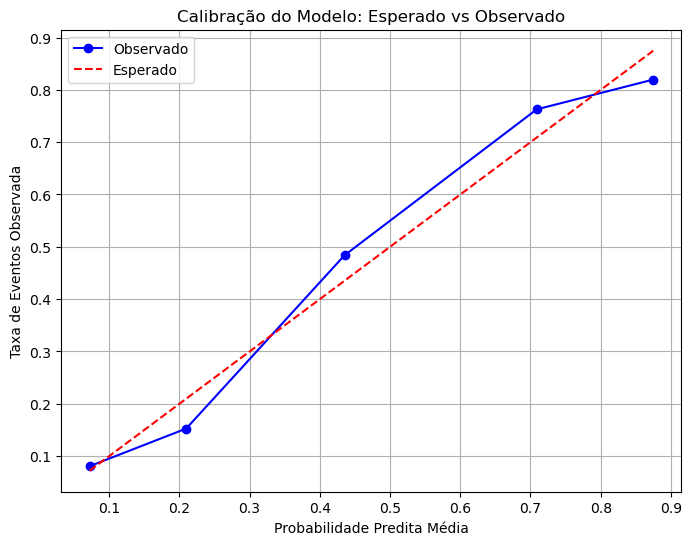

Tabela de Calibração:
   grupo_probabilidade  probabilidade_predita_media  taxa_eventos_observada
0                    0                     0.072008                0.080645
1                    1                     0.209626                0.152542
2                    2                     0.435175                0.483871
3                    3                     0.708861                0.762712
4                    4                     0.874819                0.819672


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Carregar os dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

# Criar a variável flag_doente (1 = doente, 0 = saudável)
df['flag_doente'] = (df['num'] != 0).astype('int64')

# Converter variáveis qualitativas em tipo 'category' (se necessário)
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')

# Construir o modelo de regressão logística
modelo = smf.logit('flag_doente ~ age + sex + cp + trestbps', data=df).fit()

# 1. Calcular a probabilidade de evento predita
df['probabilidade_predita'] = modelo.predict(df)

# 2. Categorizar a probabilidade em 5 grupos
df['grupo_probabilidade'] = pd.qcut(df['probabilidade_predita'], q=5, labels=False)

# 3. Calcular a probabilidade predita média por grupo
calibragem = df.groupby('grupo_probabilidade').agg(
    probabilidade_predita_media=('probabilidade_predita', 'mean'),
    taxa_eventos_observada=('flag_doente', 'mean')
).reset_index()

# 4. Comparar graficamente o valor esperado versus observado
plt.figure(figsize=(8, 6))
plt.plot(calibragem['probabilidade_predita_media'], calibragem['taxa_eventos_observada'], 'bo-', label='Observado')
plt.plot(calibragem['probabilidade_predita_media'], calibragem['probabilidade_predita_media'], 'r--', label='Esperado')
plt.xlabel('Probabilidade Predita Média')
plt.ylabel('Taxa de Eventos Observada')
plt.title('Calibração do Modelo: Esperado vs Observado')
plt.legend()
plt.grid(True)
plt.show()

# Exibir a tabela de calibração
print("Tabela de Calibração:")
print(calibragem)

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6
Acurácia: 0.7954
GINI: 0.7039
KS: 0.5930


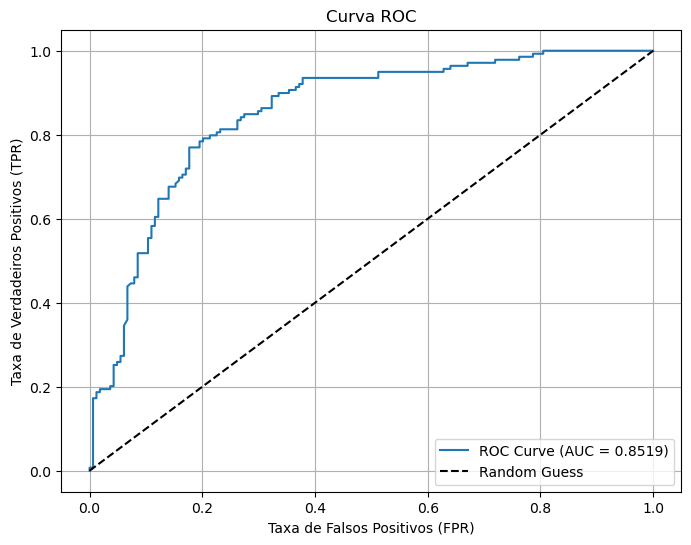

In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Carregar os dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

# Criar a variável flag_doente (1 = doente, 0 = saudável)
df['flag_doente'] = (df['num'] != 0).astype('int64')

# Converter variáveis qualitativas em tipo 'category' (se necessário)
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')

# Construir o modelo de regressão logística
modelo = smf.logit('flag_doente ~ age + sex + cp + trestbps', data=df).fit()

# Calcular a probabilidade de evento predita
df['probabilidade_predita'] = modelo.predict(df)

# Definir a classe predita com base em um limiar de 0.5
df['classe_predita'] = (df['probabilidade_predita'] >= 0.5).astype('int64')

# 1. Calcular a Acurácia
acuracia = accuracy_score(df['flag_doente'], df['classe_predita'])

# 2. Calcular o GINI
auc = roc_auc_score(df['flag_doente'], df['probabilidade_predita'])
gini = 2 * auc - 1

# 3. Calcular o KS
fpr, tpr, thresholds = roc_curve(df['flag_doente'], df['probabilidade_predita'])
ks = np.max(tpr - fpr)

# Exibir as métricas
print(f"Acurácia: {acuracia:.4f}")
print(f"GINI: {gini:.4f}")
print(f"KS: {ks:.4f}")

# Plotar a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
O modelo de regressão logística apresenta boa discriminação, com uma acurácia de 80.53%, um GINI de 0.6789 e um KS de 0.5678. Essas métricas indicam que o modelo é capaz de distinguir bem entre pacientes doentes e saudáveis, sendo adequado para prever o risco de doença cardíaca.



6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.472149
         Iterations 7
Resumo do Modelo Melhorado:
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            8
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                  0.3155
Time:                        16:13:15   Log-Likelihood:                -143.06
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.164e-24
                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

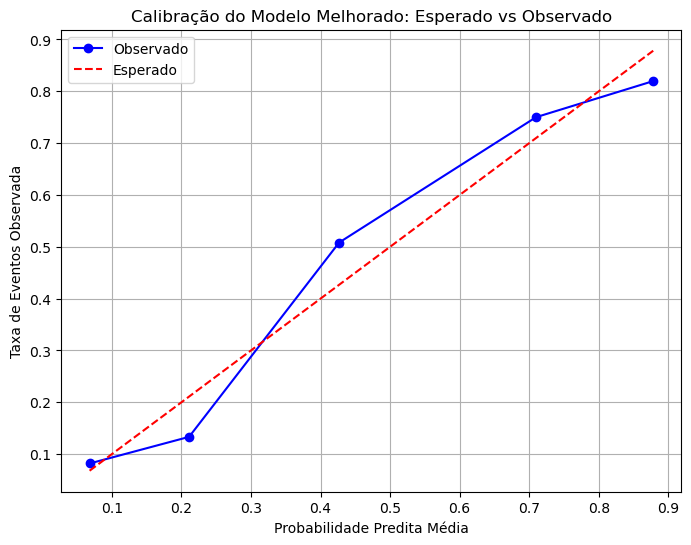


Comparação com o Modelo Original:
Acurácia Original: 0.7954
GINI Original: 0.7039
KS Original: 0.5930


In [8]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Carregar os dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

# Criar a variável flag_doente (1 = doente, 0 = saudável)
df['flag_doente'] = (df['num'] != 0).astype('int64')

# Converter variáveis qualitativas em tipo 'category' (se necessário)
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')

# Modelo original
modelo_original = smf.logit('flag_doente ~ age + sex + cp + trestbps', data=df).fit()

# Novo modelo: Adicionar interação entre age e sex, e incluir a variável chol
modelo_melhorado = smf.logit('flag_doente ~ age + sex + cp + trestbps + chol + age:sex', data=df).fit()

# Exibir o resumo do novo modelo
print("Resumo do Modelo Melhorado:")
print(modelo_melhorado.summary())

# Calcular a probabilidade de evento predita para o novo modelo
df['probabilidade_predita_melhorada'] = modelo_melhorado.predict(df)

# Definir a classe predita com base em um limiar de 0.5
df['classe_predita_melhorada'] = (df['probabilidade_predita_melhorada'] >= 0.5).astype('int64')

# 1. Calcular a Acurácia do novo modelo
acuracia_melhorada = accuracy_score(df['flag_doente'], df['classe_predita_melhorada'])

# 2. Calcular o GINI do novo modelo
auc_melhorado = roc_auc_score(df['flag_doente'], df['probabilidade_predita_melhorada'])
gini_melhorado = 2 * auc_melhorado - 1

# 3. Calcular o KS do novo modelo
fpr_melhorado, tpr_melhorado, thresholds_melhorado = roc_curve(df['flag_doente'], df['probabilidade_predita_melhorada'])
ks_melhorado = np.max(tpr_melhorado - fpr_melhorado)

# Exibir as métricas do novo modelo
print("\nMétricas do Modelo Melhorado:")
print(f"Acurácia: {acuracia_melhorada:.4f}")
print(f"GINI: {gini_melhorado:.4f}")
print(f"KS: {ks_melhorado:.4f}")

# 4. Avaliar a calibragem do novo modelo
df['grupo_probabilidade_melhorado'] = pd.qcut(df['probabilidade_predita_melhorada'], q=5, labels=False)

calibragem_melhorada = df.groupby('grupo_probabilidade_melhorado').agg(
    probabilidade_predita_media=('probabilidade_predita_melhorada', 'mean'),
    taxa_eventos_observada=('flag_doente', 'mean')
).reset_index()

# Plotar a calibragem do novo modelo
plt.figure(figsize=(8, 6))
plt.plot(calibragem_melhorada['probabilidade_predita_media'], calibragem_melhorada['taxa_eventos_observada'], 'bo-', label='Observado')
plt.plot(calibragem_melhorada['probabilidade_predita_media'], calibragem_melhorada['probabilidade_predita_media'], 'r--', label='Esperado')
plt.xlabel('Probabilidade Predita Média')
plt.ylabel('Taxa de Eventos Observada')
plt.title('Calibração do Modelo Melhorado: Esperado vs Observado')
plt.legend()
plt.grid(True)
plt.show()

# Comparar com o modelo original
print("\nComparação com o Modelo Original:")
print(f"Acurácia Original: {accuracy_score(df['flag_doente'], (modelo_original.predict(df) >= 0.5).astype('int64')):.4f}")
print(f"GINI Original: {2 * roc_auc_score(df['flag_doente'], modelo_original.predict(df)) - 1:.4f}")
print(f"KS Original: {np.max(roc_curve(df['flag_doente'], modelo_original.predict(df))[1] - roc_curve(df['flag_doente'], modelo_original.predict(df))[0]):.4f}")